In [3]:
import numpy as np
import scipy.linalg as la
import scipy.optimize as opt
import time
import matplotlib.pyplot as plt

**Exercise 1**

In [4]:
def newton_q1(Df, D2f, x0, maxiter=400, tol=1e-6):
    x = x0
    diff = 1e3
    k = 0
    
    while diff > tol and k < maxiter:
        Df_tilde = Df(x)
        z = la.solve(D2f(x), Df_tilde.T)
        x_tilde = x - z
        diff = la.norm(Df_tilde, np.inf)
        x = x_tilde
        k += 1
    
    return x, k < maxiter, k

In [5]:
newton_q1(opt.rosen_der, opt.rosen_hess, [-2, 2])

(array([1., 1.]), True, 6)

In [6]:
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


array([1.00000021, 1.00000045])

**Exercise 2**

In [7]:
def bfgs_q2(Df, x0, maxiter=400, tol=1e-6):

    diff = 1e3 # The usual cirteria is not a good choice for BFGS - consider changing this
    x = x0
    k = 0
    df = Df(x)
    A0_inv = np.eye(len(x0))
    
    while diff > tol and k < maxiter:
        x_tilde = x - A0_inv @ df.T # (12.6)
        s = x_tilde - x
        df_tilde = Df(x_tilde)
        y = df_tilde - df
        
        if (s @ y) ** 2 == 0:
            return False
        
        # (12.7)
        Ainv_tilde = A0_inv + (s @ y + y @ A0_inv @ y) * np.outer(s, s) / \
        (s @ y)**2 - (A0_inv @ np.outer(y, s) + np.outer(s, y) @ A0_inv) / (s @ y)
    
        diff = la.norm(df_tilde, np.inf)
        k += 1
        
        x = x_tilde
        df = df_tilde
        A0_inv = Ainv_tilde
        
    return x, k < maxiter, k

In [8]:
bfgs_q2(opt.rosen_der, [-2, 2])

(array([1.0000001 , 1.00000019]), True, 145)

**Exercise 3**

In [63]:
def plot_q3(N):
    
    newton_it = np.zeros(N)
    newton_time = np.zeros(N, dtype=np.float64)
    bfgs_it = np.zeros(N)
    bfgs_time = np.zeros(N, dtype=np.float64)
    scipy_it = np.zeros(N)
    scipy_time = np.zeros(N, dtype=np.float64)
    
    
    
    for n in range(N):
        x0 = np.random.uniform(-3, 3, size=2)
        
        newton_begin = time.time()
        newton_it[n] = newton_q1(opt.rosen_der, opt.rosen_hess, x0)[-1]
        newton_end = time.time() - newton_begin
        newton_time[n] = newton_end
        
        bfgs_begin = time.time()
        bfgs_it[n] = bfgs_q2(opt.rosen_der, x0)[-1]
        bfgs_end = time.time() - bfgs_begin
        bfgs_time[n] = bfgs_end
        
        scipy_begin = time.time()
        scipy_it[n] = len(opt.fmin_bfgs(opt.rosen, x0, opt.rosen_der, 
                                        disp=False, retall=True)[-1])
        scipy_end = time.time() - scipy_begin
        scipy_time[n] = scipy_end
    
    plt.figure(figsize=(12, 7))
    plt.scatter(newton_time, newton_it, alpha=0.4, label='Newton\'s Method')
    plt.scatter(bfgs_time, bfgs_it, alpha=0.4, label='BFGS')
    plt.scatter(scipy_time, scipy_it, alpha=0.4, label='scipy.optimize.fmin_bfgs()')
    plt.loglog()
    plt.xlabel('Time (seconds)')
    plt.ylabel('Iterations')
    plt.legend()
    plt.show()

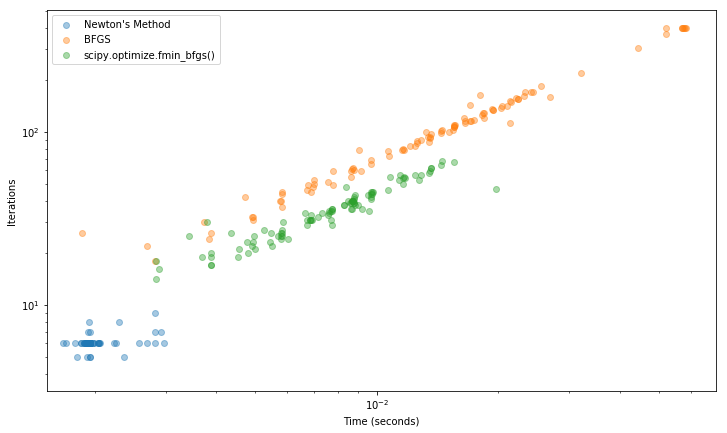

In [64]:
plot_q3(100)

**Exercise 4**

In [56]:
def gaussnewt_q4(ϕ, r, J, x, maxiter=10000, tol=1e-6):
   
    converged = False
    
    x = x0
    diff = tol + 1
    it = 0
    
    while diff > tol and it < maxiter:
        r = r(x)
        J = J(x)
        Df = J.T @ r
        D2f = J.T @ J
        z = np.linalg.solve(D2f, Df)
        
        x_tilde = x - z
        err = np.linalg.norm(x_tilde - x, np.inf)
        it += 1
        x = x_tilde
        
    if it < maxiter:
        converged = True
        
    return x, converged, it

In [57]:
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10)

model = lambda x, t: x[0]*np.sin(x[1]*t)
residual = lambda x: model(x, T) - y
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))

In [61]:
print(gnm(model, residual, jac, [2.5,.6], maxiter=10000, tol=1e-5))
minx = opt.leastsq(func=residual, x0=np.array([2.5,.6]), Dfun=jac)
print(minx)

(array([2.86123427, 0.53287597]), True, 5)
(array([2.86123427, 0.53287597]), 1)
